<a href="https://colab.research.google.com/github/blacksant0145/tareas/blob/main/Taller_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Matriz de Incidencia:
[[0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0]]
Matriz de Adyacencia:
[[  0 415   0 170   0   0 310   0   0   0   0]
 [415   0 300 317 230 330   0   0   0   0   0]
 [  0 300   0   0 275   0   0   0   0 450 225]
 [170 317   0   0   0 190 299   0   0   0   0]
 [  0 230 275   0   0 180   0 314   0   0 198]
 [  0 330   0 190 180   0 345 180   0   0   0]
 [310   0   0 299   0 345   0 450   0   0   0]
 [  0   0   0   0 314 180 450   0 230   0 267]
 [  0   0   0   0   0   0   0 230   0 312   0]
 [  0   0 450 

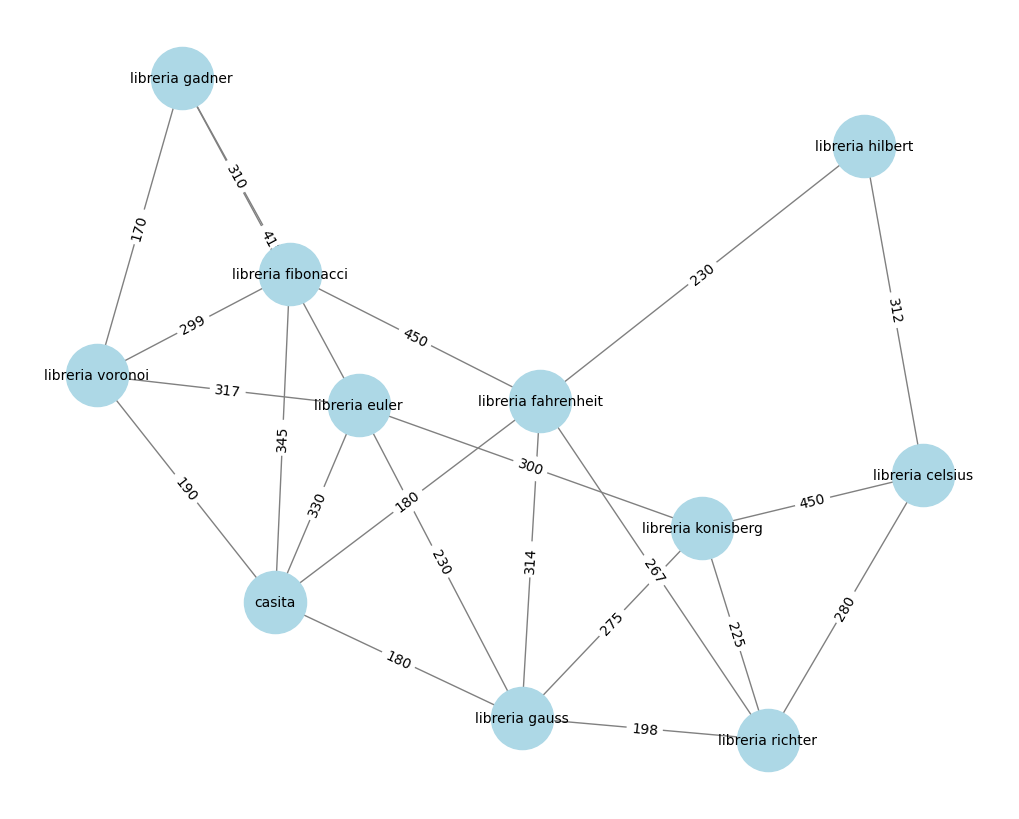

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#definir puntos

puntos =['libreria gadner','libreria euler','libreria konisberg',
         'libreria voronoi','libreria gauss','casita','libreria fibonacci',
         'libreria fahrenheit','libreria hilbert','libreria celsius','libreria richter']
edges = {
    ('libreria euler', 'libreria voronoi'): 317,
    ('libreria euler', 'libreria gadner'): 415,
    ('libreria euler', 'casita'): 330,
    ('libreria euler', 'libreria gauss'): 230,
    ('libreria euler', 'libreria konisberg'): 300,
    ('libreria gadner', 'libreria voronoi'): 170,
    ('libreria gadner', 'libreria fibonacci'): 310,
    ('libreria voronoi', 'libreria fibonacci'): 299,
    ('libreria voronoi', 'casita'): 190,
    ('casita', 'libreria gauss'): 180,
    ('casita', 'libreria fibonacci'): 345,
    ('casita', 'libreria fahrenheit'): 180,
    ('libreria gauss', 'libreria konisberg'): 275,
    ('libreria gauss', 'libreria richter'): 198,
    ('libreria richter', 'libreria celsius'): 280,
    ('libreria richter', 'libreria fahrenheit'): 267,
    ('libreria gauss', 'libreria fahrenheit'): 314,
    ('libreria konisberg', 'libreria richter'): 225,
    ('libreria konisberg', 'libreria celsius'): 450,
    ('libreria fibonacci', 'libreria fahrenheit'): 450,
    ('libreria fahrenheit', 'libreria hilbert'): 230,
    ('libreria celsius', 'libreria hilbert'): 312
}

#matriz incidencia
inc_matrix = np.zeros((len(puntos), len(edges)), dtype=int)
for idx, ((punto1, punto2), distance) in enumerate(edges.items()):
    i, j = puntos.index(punto1), puntos.index(punto2)
    inc_matrix[i][idx] = 1
    inc_matrix[j][idx] = 1

print("\nMatriz de Incidencia:")
print(inc_matrix)

#matriz adyacencia
adj_matrix = np.zeros((len(puntos), len(puntos)), dtype=int)
for (node1, node2), distance in edges.items():
    i, j = puntos.index(node1), puntos.index(node2)
    adj_matrix[i][j] = distance
    adj_matrix[j][i] = distance

print("Matriz de Adyacencia:")
print(adj_matrix)

# Función para buscar todas las rutas posibles entre 'Casita' y 'Celsius' (DFS)
def buscar_caminos(grafo, inicio, destino, camino=[]):
    camino = camino + [inicio]
    if inicio == destino:
        return [camino]
    if inicio not in grafo:
        return []
    caminos = []
    for nodo in grafo[inicio]:
        if nodo not in camino:
            nuevos_caminos = buscar_caminos(grafo, nodo, destino, camino)
            for nuevo_camino in nuevos_caminos:
                caminos.append(nuevo_camino)
    return caminos

# Función para calcular el costo total de una ruta
def calcular_costo(grafo, camino):
    costo_total = 0
    for i in range(len(camino) - 1):
        costo_total += grafo[camino[i]][camino[i + 1]]
    return costo_total

# Buscar todas las rutas posibles desde 'Casita' a 'Celsius'
rutas_posibles = buscar_caminos(edges, "casita", "celsius")

# Calcular los costos de cada ruta
rutas_con_costos = [(ruta, calcular_costo(edges, ruta)) for ruta in rutas_posibles]

# Ordenar las rutas por costo
rutas_ordenadas = sorted(rutas_con_costos, key=lambda x: x[1])

# Mostrar las 4 rutas más cortas
print("\nLas 4 rutas más cortas desde 'casita' hasta 'libreria celsius':")
for i, (ruta, costo) in enumerate(rutas_ordenadas[:4], 1):
    print(f"Ruta {i}: {' -> '.join(ruta)} con un costo de {costo}")

# Crear el grafo para encontrar el camino más corto
G = nx.Graph()
for (punto1, punto2), distance in edges.items():
    G.add_edge(punto1, punto2, weight=distance)

# Encontrar el camino más corto de 'Casita' a 'Celsius'
shortest_path = nx.shortest_path(G, source='casita', target='libreria celsius', weight='weight')
shortest_distance = nx.shortest_path_length(G, source='casita', target='libreria celsius', weight='weight')

print("\nCamino más corto de 'casita' a 'libreria celsius':", shortest_path)
print("Distancia más corta de 'casita' a 'libreria celsius':", shortest_distance)

# Visualizar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d for (u, v, d) in G.edges(data='weight')})
plt.show()
